In [1]:
#pip install gpxpy

In [2]:
import gpxpy
import gpxpy.gpx
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df_act=pd.read_csv("bcs.csv")
df_act= df_act[df_act["Activity Type"] == "Backcountry Skiing"]
df_act

,Unnamed: 0,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),...,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C),weekday,Duration,MinDuration
0,1,2023-04-10 09:57:03+00:00,2023-04-10 13:07:42+00:00,10874548547,Hemne Backcountry Skiing,NaN,Hemne,Europe/Paris,+02:00,03:10:39,...,9172.0,NaN,NaN,NaN,NaN,NaN,NaN,Monday,1900-01-01 03:10:39,190
1,2,2023-04-06 22:38:50+00:00,2023-04-06 23:47:00+00:00,10850440683,Verdal Backcountry Skiing,NaN,Verdal,Europe/Paris,+02:00,01:08:09,...,688.0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,1900-01-01 01:08:09,68
2,3,2023-04-05 13:33:58+00:00,2023-04-05 15:06:30+00:00,10841182291,Verdal Backcountry Skiing,NaN,Verdal,Europe/Paris,+02:00,01:23:45,...,1878.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,1900-01-01 01:23:45,83
3,4,2023-04-04 13:09:28+00:00,2023-04-04 15:14:13+00:00,10834112411,Verdal Backcountry Skiing,NaN,Verdal,Europe/Paris,+02:00,01:44:39,...,5658.0,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,1900-01-01 01:44:39,104
4,5,2023-04-02 09:47:08+00:00,2023-04-02 15:52:20+00:00,10821256786,Oppdal Navigate,NaN,Oppdal,Europe/Paris,+02:00,05:56:39,...,18150.0,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,1900-01-01 05:56:39,356
5,6,2023-03-29 15:32:41+00:00,2023-03-29 17:33:25+00:00,10795460281,Klæbu Backcountry Skiing,NaN,Klæbu,Europe/Paris,+02:00,01:19:09,...,5402.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,1900-01-01 01:19:09,79
6,7,2023-03-28 16:40:47+00:00,2023-03-28 18:53:59+00:00,10789156013,Klæbu Backcountry Skiing,NaN,Klæbu,Europe/Paris,+02:00,01:38:12,...,4842.0,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,1900-01-01 01:38:12,98
7,9,2023-03-25 11:08:12+00:00,2023-03-25 13:53:08+00:00,10767035698,Meråker Backcountry Skiing,NaN,Meråker,Europe/Paris,+01:00,02:44:56,...,6772.0,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,1900-01-01 02:44:56,164
8,13,2023-03-15 19:23:27+00:00,2023-03-15 21:04:15+00:00,10702645341,Klæbu Backcountry Skiing,NaN,Klæbu,Europe/Paris,+01:00,01:40:43,...,5774.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,1900-01-01 01:40:43,100
10,15,2023-03-11 12:12:18+00:00,2023-03-11 13:11:04+00:00,10673603158,Levanger Backcountry Skiing,NaN,Levanger,Europe/Paris,+01:00,00:58:45,...,3618.0,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,1900-01-01 00:58:45,58


In [4]:
act_list = df_act["Activity ID"]
df_list=[]
for act in act_list:
    gpx_name = "act_data/activity_" + str(act) + ".gpx"
    with open(gpx_name, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    route_info = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                route_info.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                    'elevation': point.elevation,
                    'time':point.time
                })
    df = pd.DataFrame(route_info)
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.tz_localize(None)
    df.set_index('time', inplace=True)
    def seconds_to_hm(seconds):
        return str(datetime.timedelta(seconds=seconds))
    # calculate the time difference in seconds
    df['training_time'] = (df.index - df.index[0]).total_seconds()
    # set the first value to zero
    df['training_time'] = df['training_time'] - df['training_time'].iloc[0]
    df['tt_h'] = df['training_time'].apply(seconds_to_hm)
    df.set_index('tt_h', inplace=True)
    df= df[["elevation"]]
    df.columns=[str(act)]
    df_list.append(df)
df_concat = pd.concat(df_list,axis =1)
df_concat = df_concat.sort_index()
df_concat = df_concat.fillna(method="bfill")
df_concat

,10874548547,10850440683,10841182291,10834112411,10821256786,10795460281,10789156013,10767035698,10702645341,10673603158,10488132494,10443829563,10359182419,10328375100,10244821022,10113442902
0:00:00,213.600006,62.799999,552.799988,320.200012,584.799988,206.199997,274.200012,351.000000,206.199997,475.200012,199.0,353.000000,657.799988,206.199997,228.0,206.199997
0:00:01,213.600006,62.799999,552.799988,320.200012,584.799988,206.399994,274.200012,350.799988,206.199997,475.200012,199.0,350.399994,658.000000,205.800003,228.0,206.199997
0:00:02,213.600006,62.799999,552.799988,320.200012,585.000000,206.399994,274.200012,350.799988,205.600006,475.200012,199.0,350.399994,658.000000,205.800003,228.0,206.199997
0:00:03,213.600006,62.799999,552.799988,320.200012,585.000000,206.399994,274.200012,350.799988,205.600006,475.200012,199.0,350.399994,658.000000,205.800003,228.0,206.199997
0:00:04,213.600006,62.799999,552.400024,320.200012,585.000000,206.399994,274.200012,350.799988,205.600006,475.200012,199.0,350.399994,658.000000,205.800003,228.0,206.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6:04:53,NaN,NaN,NaN,NaN,575.200012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6:05:01,NaN,NaN,NaN,NaN,575.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6:05:04,NaN,NaN,NaN,NaN,575.200012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6:05:08,NaN,NaN,NaN,NaN,575.400024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


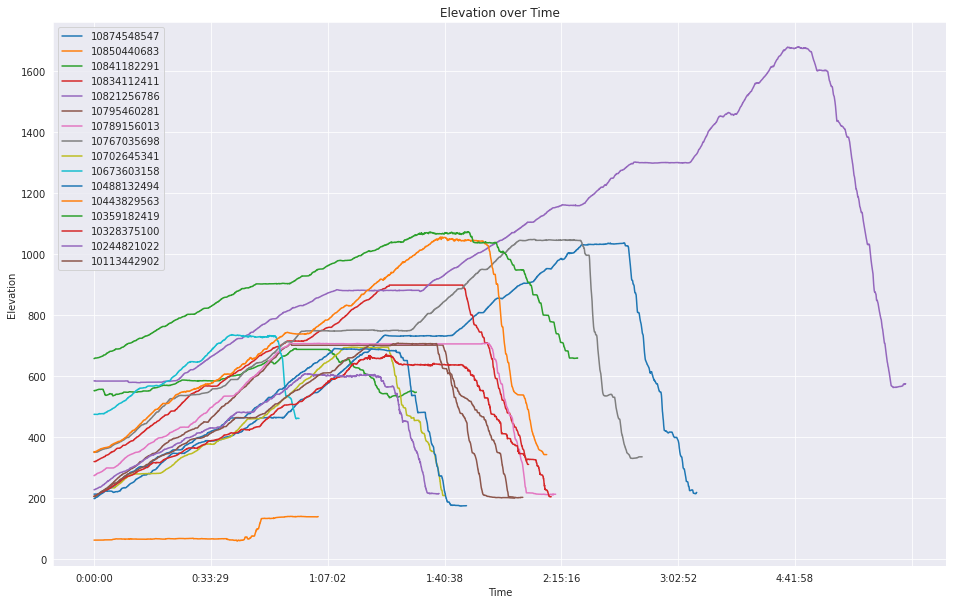

In [5]:
# Set the style
sns.set_style('darkgrid')

# Plot the data
fig, ax = plt.subplots(figsize=(16, 10))
df_concat.plot(ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Elevation')
ax.set_title('Elevation over Time')

plt.show()

In [6]:
df_act= df_act[df_act["Location Name"] == "Klæbu"]
act_list = df_act["Activity ID"]
df_list=[]
for act in act_list:
    gpx_name = "act_data/activity_" + str(act) + ".gpx"
    with open(gpx_name, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
    route_info = []
    for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    route_info.append({
                        'latitude': point.latitude,
                        'longitude': point.longitude,
                        'elevation': point.elevation,
                        'time':point.time
                    })
    route_df = pd.DataFrame(route_info)
    df_list.append(route_df)

In [7]:
colors = ['red','blue','green','purple','orange','darkred','pink']
fg = folium.FeatureGroup(name='lines')
map = folium.Map(location=[63.2634, 10.40], zoom_start=15)
# create polyline for each row in dataframe
for c, route_df in enumerate(df_list):
    cord_list=[]
    for i, row in route_df.iterrows():
        coords = [row['latitude'], row['longitude']]
        cord_list.append(coords)
    
    my_PolyLine=folium.PolyLine(locations=cord_list,color=colors[c], weight=5, opacity=0.5)
    map.add_child(my_PolyLine)
map
